*by Стояновская Мария // stoyanovskaya.m@yandex.ru // telegram @mariasto*


# Анализ логов просмотра онкофорума "Белые ночи" 


**Содержание:**

- [Изучим общую информацию о данных](#id-section1) <div id='id-section2'/>
- [Вывод](#id-section3) <div id='id-section4'/>


- [Подготовим данные к анализу](#id-section5) <div id='id-section6'/>
- [Вывод](#id-section7) <div id='id-section8'/>


- [1.Разбивка каждого потока по каждому отдельному мероприятию на основании данных о начале и окончании сессии](#id-section9) <div id='id-section10'/>
- [Вывод](#id-section11) <div id='id-section12'/>


- [2.Общее количество уникальных зрителей за все дни мероприятия](#id-section13) <div id='id-section14'/>
- [Вывод](#id-section15) <div id='id-section16'/>


- [3.Общее количество уникальных зрителей в каждый день по каждой сессии (уже разделенных в соответствии с п.1)](#id-section17) <div id='id-section18'/>
- [Вывод](#id-section19) <div id='id-section20'/>


- [4.Приводим данные по просмотрам каждого зала к “общему времени”](#id-section21) <div id='id-section22'/>
- [Вывод](#id-section23) <div id='id-section24'/>


- [5.Графики: как по каждой сессии во времени (интервал 5 минут) изменялось количество уникальных пользователей, которые смотрят трансляцию](#id-section25) <div id='id-section26'/>
- [Вывод](#id-section27) <div id='id-section28'/>


- [6.Графики: как по каждой сессии во времени (интервал 5 минут) изменялось количество уникальных пользователей, которые смотрят трансляцию более 15 минут](#id-section29) <div id='id-section30'/>
- [Вывод](#id-section31) <div id='id-section32'/>


- [7.По каждой сессии считаем, сколько по длительности каждый уникальный пользователь смотрел трансляцию](#id-section33) <div id='id-section34'/>
- [Вывод](#id-section35) <div id='id-section36'/>


- [8.По каждой сессии считаем количество пользователей, у которых сессия была 0 минут, 1 минута, 5 минут, 15 минут, 30 минут и более](#id-section37) <div id='id-section38'/>
- [Вывод](#id-section39) <div id='id-section40'/>


- [9.Когорный анализ по глубине просмотра по каждой сессии](#id-section41) <div id='id-section42'/>
- [Вывод](#id-section43) <div id='id-section44'/>


- [10.С каких устройств смотрели форум пользователи](#id-section45) <div id='id-section46'/>
- [Вывод](#id-section47) <div id='id-section48'/>


- [11.По каждой сессии выведем по 10 пользователей с id и временем просмотра, которые смотрели максимальное количество времени (данную сессию)](#id-section49) <div id='id-section50'/>
- [Вывод](#id-section51) <div id='id-section52'/>

<div id='id-section1'/>

## [Изучим общую информацию о данных](#id-section2)

In [1881]:
# импортируем библиотеки для анализа

from IPython.display import display
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
pd.options.plotting.backend = "plotly"
from plotly import graph_objects as go

import math
import numpy as np

In [1882]:
# открываем файлы с данными, смотрим общую информацию о переменных

try:
    df = pd.read_csv('file_name.csv')
    events = pd.read_excel('events.xls', sheet_name = 'Лист1')
    
except:
    link1 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSVQsUCbx-vIs-r06q4zFj-SeH2MXByF4pcmJ9AjaIRkotN3TNQqqjovZjYKHVi2HA4dP-d0r5USbL9/pub?output=csv'
    df = pd.read_csv(link1)
    
    link2 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRPVL2UpuiF0IUh03VGwiNM49q3iIZq77lIga9xaelG10PrGbD-v4hrilvBFWwB5Q/pub?output=xlsx'
    events = pd.read_excel(link2)
    
    
for table in [df, events]:
    display(table.head(10))
    table.info()

,Unnamed: 0,id,daterecord,idPeople,totalviewingtime,potok,device,opsystem,browser,datestart,...,timestampend,timeviews,countclick,idopenses,idcloseses,ip,serversession,openingstatus,closestatus,date
0,0,122684,2022-07-03,2357,0,1,Мобильное,iOS 14.7.1,Mobile Safari,2022-07-03 08:06:09,...,1656824771,0,0,NaN,WqnucCfbtEtuf8,176.59.38.169,e3ntSVo3LASQCoLonqtUd8SfuSGf4U3D,PLAY_RESTART_SOKET,DESTROY_STOP,2022-07-03 00:00:00
1,1,122685,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:26:53,...,1656826017,0,0,NaN,bCLabnh9nUyYpf,92.255.8.85,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,DESTROY_CHANGE_HALL,2022-07-03 00:00:00
2,2,122686,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:29:33,...,1656826195,0,0,NaN,7VF6SxYJmYkTGY,92.255.8.85,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,DESTROY_CHANGE_HALL,2022-07-03 00:00:00
3,3,122687,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:30:00,...,1656826241,0,0,NaN,7VF6SxYJmYkTGY,92.255.8.85,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,DESTROY_CHANGE_HALL,2022-07-03 00:00:00
4,4,122688,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:41:35,...,1656827001,2,0,NaN,7VF6SxYJmYkTGY,92.255.8.85,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,NaN,2022-07-03 00:00:00
5,5,122689,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:43:27,...,1656827053,0,0,NaN,Qff58LGvX8T5hW,92.255.8.92,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_START,NaN,2022-07-03 00:00:00
6,6,122690,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:44:17,...,1656827062,0,0,NaN,RKhx9tEbERaS68,92.255.8.92,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_START,DESTROY_CHANGE_HALL,2022-07-03 00:00:00
7,7,122691,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:44:29,...,1656827395,5,0,NaN,RKhx9tEbERaS68,92.255.8.92,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,DESTROY_STOP,2022-07-03 00:00:00
8,8,122692,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:56:49,...,1656827979,3,0,NaN,RKhx9tEbERaS68,92.255.8.92,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,DESTROY_CHANGE_HALL,2022-07-03 00:00:00
9,9,122693,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 09:29:28,...,1656829773,0,0,NaN,RKhx9tEbERaS68,92.255.8.92,uieti7Qa7p2LlCT18aFghUy6vz5CL5XC,PLAY_RESTART_STOP,DESTROY_CHANGE_HALL,2022-07-03 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69323 entries, 0 to 69322
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        69323 non-null  int64 
 1   id                69323 non-null  int64 
 2   daterecord        69323 non-null  object
 3   idPeople          69323 non-null  int64 
 4   totalviewingtime  69323 non-null  int64 
 5   potok             69323 non-null  int64 
 6   device            69323 non-null  object
 7   opsystem          69322 non-null  object
 8   browser           69322 non-null  object
 9   datestart         69323 non-null  object
 10  dateend           69323 non-null  object
 11  timestampstart    69323 non-null  int64 
 12  timestampend      69323 non-null  int64 
 13  timeviews         69323 non-null  int64 
 14  countclick        69323 non-null  int64 
 15  idopenses         3836 non-null   object
 16  idcloseses        64796 non-null  object
 17  ip          

,date,event,potok,session_name,group_lec
0,2022-07-03 09:00:00,start,1,Лучевая терапия при нейроонкологических заболе...,radiotherapy
1,2022-07-03 10:35:00,stop,1,Лучевая терапия при нейроонкологических заболе...,radiotherapy
2,2022-07-03 10:35:00,start,1,Лучевая терапия при злокачественных новообразо...,radiotherapy
3,2022-07-03 12:20:00,stop,1,Лучевая терапия при злокачественных новообразо...,radiotherapy
4,2022-07-03 12:30:00,start,1,Лучевая терапия злокачественных новообразовани...,radiotherapy
5,2022-07-03 14:30:00,stop,1,Лучевая терапия злокачественных новообразовани...,radiotherapy
6,2022-07-03 15:00:00,start,1,Лучевая терапия рака молочной железы,radiotherapy
7,2022-07-03 16:00:00,stop,1,Лучевая терапия рака молочной железы,radiotherapy
8,2022-07-03 16:00:00,start,1,Лучевая терапия злокачественных новообразовани...,radiotherapy
9,2022-07-03 18:30:00,stop,1,Лучевая терапия злокачественных новообразовани...,radiotherapy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          258 non-null    datetime64[ns]
 1   event         258 non-null    object        
 2   potok         258 non-null    int64         
 3   session_name  258 non-null    object        
 4   group_lec     258 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 10.2+ KB


<div class="alert alert-block alert-warning">

<div id='id-section3'/>

### [Вывод](#id-section4)

- В таблице-выгрузке из базы данных `df` содержится 69 323 строки, при этом мы сразу видим, что очень много пропущенных значений в переменных: `idopenses`, `idcloseses`, `ip`, `openingstatus`, `closestatus`. Также по одному пропущенному значению мы можем заметить в переменных: `opsystem`, `browser`.

- Категориальные переменные (`id`, `idPeople`, `potok`, `device`, etc...) и количественные (`totalviewingtime`, `timeviews`, `countclick`) имеет корректные типы данных. Однако переменные, связанные с датами и временем, имеют неверный тип данных (`object`).

- В начале и конце таблицы есть дублирующиеся столбцы с индексами и датами. 

---

- В таблице с мероприятиями `events` 258 строк, каждое мероприятие для каждого потока разбивается попарно на две строки: с временем начала и окончания. 

- Пропущеных значений нет, все переменные имеют корректные типы данных.
    
    
</div>


<div id='id-section5'/>

## [Подготовим данные к анализу](#id-section6)

In [1883]:
# удаляем дублирующиеся столбцы с индексами и датами

df = df.drop(['Unnamed: 0', 'date'], axis = 1)

In [1884]:
# меняем тип данных во временнЫх переменных на корректный тип

df[['daterecord', 'datestart', 'dateend']] = df[['daterecord', 'datestart', 'dateend']].astype('datetime64[s]')


In [1885]:
# проверяем количество полных дубликатов в данных 
# (их нет)

display(df.duplicated().sum())

0

In [1886]:
# проверяем полные дубликаты в случае, когда мы удаляем идентификатор, присвоенный автоматически

df_drop_id = df.drop('id', axis = 1)

display('Количество дубликатов после удаления идентификатора записи: ' + str(df_drop_id.duplicated().sum()))

display('Процентное соотношение дубликатов от общего числа строк: ' + str(df_drop_id.duplicated().sum() / 
                                                                         df.shape[0] * 100))

'Количество дубликатов после удаления идентификатора записи: 908'

'Процентное соотношение дубликатов от общего числа строк: 1.3098105967716343'

In [1887]:
# смотрим, как выглядят дублирующиеся строчки в данных

display(df[df_drop_id.duplicated()].head(10))

,id,daterecord,idPeople,totalviewingtime,potok,device,opsystem,browser,datestart,dateend,timestampstart,timestampend,timeviews,countclick,idopenses,idcloseses,ip,serversession,openingstatus,closestatus
3640,126315,2022-07-02,2040,445,1,Десктоп,Mac OS X 10.15.7,Safari,2022-07-02 14:55:29,2022-07-02 14:55:29,1656762929,1656762929,0,0,NaN,kURxwt6yUfAdJy,NaN,mfH9mac6KhWO7fvm95N9fqjkJzAuz8mD,PLAY_RESTART_PAUSE,PAUSE
8351,131012,2022-07-01,2044,330,4,Мобильное,iOS 15.5,Mobile Safari,2022-07-01 14:02:32,2022-07-01 14:02:32,1656673352,1656673352,0,0,NaN,fybgbSHRPbpZe7,213.87.148.53,6YBugh6F3YU21R5GC1Zl7W17MytiEXhr,NaN,PAUSE
15693,138337,2022-06-30,1921,438,2,Десктоп,Windows,Chrome,2022-06-30 14:50:15,2022-06-30 14:50:15,1656589815,1656589815,0,0,NaN,BPf88VTtYhxfsC,217.79.12.98,zGTxDMvrkrKnPKQ4uBgmVldgUXEqL6nr,NaN,PAUSE
15694,138338,2022-06-30,1921,438,2,Десктоп,Windows,Chrome,2022-06-30 14:50:15,2022-06-30 14:50:15,1656589815,1656589815,0,0,NaN,BPf88VTtYhxfsC,217.79.12.98,zGTxDMvrkrKnPKQ4uBgmVldgUXEqL6nr,NaN,PAUSE
15695,138339,2022-06-30,1921,438,2,Десктоп,Windows,Chrome,2022-06-30 14:50:15,2022-06-30 14:50:15,1656589815,1656589815,0,0,NaN,BPf88VTtYhxfsC,217.79.12.98,zGTxDMvrkrKnPKQ4uBgmVldgUXEqL6nr,NaN,PAUSE
15696,138340,2022-06-30,1921,438,2,Десктоп,Windows,Chrome,2022-06-30 14:50:15,2022-06-30 14:50:15,1656589815,1656589815,0,0,NaN,BPf88VTtYhxfsC,217.79.12.98,zGTxDMvrkrKnPKQ4uBgmVldgUXEqL6nr,NaN,PAUSE
15699,138343,2022-06-30,1921,438,2,Десктоп,Windows,Chrome,2022-06-30 14:50:16,2022-06-30 14:50:16,1656589816,1656589816,0,0,NaN,BPf88VTtYhxfsC,217.79.12.98,zGTxDMvrkrKnPKQ4uBgmVldgUXEqL6nr,NaN,PAUSE
15700,138344,2022-06-30,1921,438,2,Десктоп,Windows,Chrome,2022-06-30 14:50:16,2022-06-30 14:50:16,1656589816,1656589816,0,0,NaN,BPf88VTtYhxfsC,217.79.12.98,zGTxDMvrkrKnPKQ4uBgmVldgUXEqL6nr,NaN,PAUSE
15701,138345,2022-06-30,1921,438,2,Десктоп,Windows,Chrome,2022-06-30 14:50:16,2022-06-30 14:50:16,1656589816,1656589816,0,0,NaN,BPf88VTtYhxfsC,217.79.12.98,zGTxDMvrkrKnPKQ4uBgmVldgUXEqL6nr,NaN,PAUSE
15702,138346,2022-06-30,1921,438,2,Десктоп,Windows,Chrome,2022-06-30 14:50:16,2022-06-30 14:50:16,1656589816,1656589816,0,0,NaN,BPf88VTtYhxfsC,217.79.12.98,zGTxDMvrkrKnPKQ4uBgmVldgUXEqL6nr,NaN,PAUSE


# 📌📌📌

- **Сбой в системе автоматической идентификации строк** очень хорошо виден, начиная с 3-й строки: пользователь с `idPeople` 1921 просматривал запись мероприятия 2022-06-30 в 14:50:15, но этот факт был зафиксирован системой несколько раз под разными `id`.

- **Система автоматической идентификации записей давала сбой в 1.3% случаев.**

- Такие дубликаты подлежат удалению для чистоты исследования. 

In [1888]:
# отбираем записи без дублирующихся строк
df_without_dupl = df_drop_id.duplicated().apply(lambda x: not x)


# переопределяем нашу основную таблицу с данными, теперь она без дубликатов
df = df[df_without_dupl]

In [1889]:
# по каждой переменной смотрим долю пропущеных значений

display(df.isna().mean().sort_values(ascending = False))

idopenses           0.943930
openingstatus       0.917474
closestatus         0.603172
idcloseses          0.066170
ip                  0.052503
browser             0.000015
opsystem            0.000015
daterecord          0.000000
idPeople            0.000000
totalviewingtime    0.000000
potok               0.000000
device              0.000000
dateend             0.000000
datestart           0.000000
timestampstart      0.000000
timestampend        0.000000
timeviews           0.000000
countclick          0.000000
serversession       0.000000
id                  0.000000
dtype: float64

# 📌📌📌

- Больше всего пропусков (94.4% и 91.7%) в переменных `idopenses` и `openingstatus`. Возможно, это связано с особенностями системы контроля присутствия при онлайн-трансляции.

- 60% пропусков в переменной `closestatus`.

- 6.6% пропущенных значений содержит переменная `idcloseses`, а также в 5.2% случаев не удалось определить `ip`-адрес, с которого пользователь подключался к трансляции.

- На этапе просмотра общей информации о данных мы уже заметили, что есть по 1 пропуску в переменных `browser` и `opsystem` - это составляет по 0.0015% от общего количества. **Эти строки можно удалить.**

In [1890]:
# удаляем строки с пропусками в browser и opsystem

df = df.dropna(subset = ['browser', 'opsystem'])

<div class="alert alert-block alert-warning">

<div id='id-section7'/>

### [Вывод](#id-section8)

- На данном этапе мы подготовили данные для дальнейшего анализа. 

- При этом нами был обнаружен сбой в системе автоматической идентификации строк: в 1.3% случаев система фиксировала одни и те же действия пользователей несколько раз под разными идентификационными номерами.

- Также мы зафиксировали большое количество пропусков в переменных `idopenses`, `openingstatus`, `closestatus`. Возможно, это связано с особенностями системы контроля присутствия при онлайн-трансляции.

</div>    


<div id='id-section9'/>

## [1. Разбивка каждого потока по каждому отдельному мероприятию на основании данных о начале и окончании сессии](#id-section10)


In [1891]:
# для даты и времени каждого мероприятия из оф.программы выделим timestamp в формате UTC

events['timestamp'] = events['date'].apply(lambda x: x.value)

display(events.head())

,date,event,potok,session_name,group_lec,timestamp
0,2022-07-03 09:00:00,start,1,Лучевая терапия при нейроонкологических заболе...,radiotherapy,1656838800000000000
1,2022-07-03 10:35:00,stop,1,Лучевая терапия при нейроонкологических заболе...,radiotherapy,1656844500000000000
2,2022-07-03 10:35:00,start,1,Лучевая терапия при злокачественных новообразо...,radiotherapy,1656844500000000000
3,2022-07-03 12:20:00,stop,1,Лучевая терапия при злокачественных новообразо...,radiotherapy,1656850800000000000
4,2022-07-03 12:30:00,start,1,Лучевая терапия злокачественных новообразовани...,radiotherapy,1656851400000000000


In [1892]:
# выделим начальное время каждого мероприятия

events_start = events[events['event'] == "start"].reset_index().drop('index', axis = 1)

display(events_start.head())

,date,event,potok,session_name,group_lec,timestamp
0,2022-07-03 09:00:00,start,1,Лучевая терапия при нейроонкологических заболе...,radiotherapy,1656838800000000000
1,2022-07-03 10:35:00,start,1,Лучевая терапия при злокачественных новообразо...,radiotherapy,1656844500000000000
2,2022-07-03 12:30:00,start,1,Лучевая терапия злокачественных новообразовани...,radiotherapy,1656851400000000000
3,2022-07-03 15:00:00,start,1,Лучевая терапия рака молочной железы,radiotherapy,1656860400000000000
4,2022-07-03 16:00:00,start,1,Лучевая терапия злокачественных новообразовани...,radiotherapy,1656864000000000000


In [1893]:
# выделим конечное время каждого мероприятия

events_stop = events[events['event'] == "stop"].reset_index().drop('index', axis = 1)

display(events_stop.head())

,date,event,potok,session_name,group_lec,timestamp
0,2022-07-03 10:35:00,stop,1,Лучевая терапия при нейроонкологических заболе...,radiotherapy,1656844500000000000
1,2022-07-03 12:20:00,stop,1,Лучевая терапия при злокачественных новообразо...,radiotherapy,1656850800000000000
2,2022-07-03 14:30:00,stop,1,Лучевая терапия злокачественных новообразовани...,radiotherapy,1656858600000000000
3,2022-07-03 16:00:00,stop,1,Лучевая терапия рака молочной железы,radiotherapy,1656864000000000000
4,2022-07-03 18:30:00,stop,1,Лучевая терапия злокачественных новообразовани...,radiotherapy,1656873000000000000


In [1894]:
# объединяем 2 таблицы

events_all = events_start.join(events_stop[['date', 'timestamp']], rsuffix='_stop')

events_all = events_all.rename(columns = {'date': 'date_start', 'timestamp': 'timestamp_start'})

events_all = events_all.drop('event', axis = 1)

In [1895]:
# теперь на 1 строке указано начало и конец для каждого мероприятия

display(events_all.head())

,date_start,potok,session_name,group_lec,timestamp_start,date_stop,timestamp_stop
0,2022-07-03 09:00:00,1,Лучевая терапия при нейроонкологических заболе...,radiotherapy,1656838800000000000,2022-07-03 10:35:00,1656844500000000000
1,2022-07-03 10:35:00,1,Лучевая терапия при злокачественных новообразо...,radiotherapy,1656844500000000000,2022-07-03 12:20:00,1656850800000000000
2,2022-07-03 12:30:00,1,Лучевая терапия злокачественных новообразовани...,radiotherapy,1656851400000000000,2022-07-03 14:30:00,1656858600000000000
3,2022-07-03 15:00:00,1,Лучевая терапия рака молочной железы,radiotherapy,1656860400000000000,2022-07-03 16:00:00,1656864000000000000
4,2022-07-03 16:00:00,1,Лучевая терапия злокачественных новообразовани...,radiotherapy,1656864000000000000,2022-07-03 18:30:00,1656873000000000000


In [1896]:
# функция сравнивает время просмотра каждого зрителя с временем каждого мероприятия и определяет,
# какое именно мероприятие смотрел зритель

def intersect_time(user_start, user_stop, ev_start, ev_stop):
    if user_start > ev_stop:
        return 0
    if user_stop < ev_start:
        return 0
    if user_start <= ev_start and user_stop <= ev_stop:
        return user_stop - ev_start
    if user_start >= ev_start and user_stop <= ev_stop:
        return user_stop - user_start
    if user_start >= ev_start and user_stop >= ev_stop:
        return ev_stop - user_start
    if user_start <= ev_start and user_stop >= ev_stop:
        return ev_stop - ev_start

In [1897]:
# в зависимости от времени просмотра и потока функция подбирает мероприятие(-я), которое проходило в это время  
# и возвращает список с индексом мероприятия
# если время просмотра зрителя не совпадает ни с каким мероприятием, то список будет пустой

def func(row):
    potok = row[0]
    user_start = row[1]
    user_stop = row[2]
    lst = []
    sorted_events = events_all.query(f'(potok == {potok})')
    for index, row in sorted_events.iterrows():
        ev_start = row['date_start']
        ev_stop = row['date_stop']
        time = intersect_time(user_start.value, user_stop.value, ev_start.value, ev_stop.value)
        if time > 0:
            lst.append(index)
    return lst

In [1898]:
# применяем ф-цию к датафрейму

df['event_index'] = df[['potok', 'datestart', 'dateend']].apply(func, axis = 1)

In [1899]:
display(df.head())

,id,daterecord,idPeople,totalviewingtime,potok,device,opsystem,browser,datestart,dateend,...,timestampend,timeviews,countclick,idopenses,idcloseses,ip,serversession,openingstatus,closestatus,event_index
0,122684,2022-07-03,2357,0,1,Мобильное,iOS 14.7.1,Mobile Safari,2022-07-03 08:06:09,2022-07-03 08:06:11,...,1656824771,0,0,NaN,WqnucCfbtEtuf8,176.59.38.169,e3ntSVo3LASQCoLonqtUd8SfuSGf4U3D,PLAY_RESTART_SOKET,DESTROY_STOP,[]
1,122685,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:26:53,2022-07-03 08:26:57,...,1656826017,0,0,NaN,bCLabnh9nUyYpf,92.255.8.85,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,DESTROY_CHANGE_HALL,[]
2,122686,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:29:33,2022-07-03 08:29:55,...,1656826195,0,0,NaN,7VF6SxYJmYkTGY,92.255.8.85,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,DESTROY_CHANGE_HALL,[]
3,122687,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:30:00,2022-07-03 08:30:41,...,1656826241,0,0,NaN,7VF6SxYJmYkTGY,92.255.8.85,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,DESTROY_CHANGE_HALL,[]
4,122688,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:41:35,2022-07-03 08:43:21,...,1656827001,2,0,NaN,7VF6SxYJmYkTGY,92.255.8.85,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,NaN,[]


In [1900]:
# раскрываем списки с мероприятиями

df_flat = df.explode('event_index')

In [1901]:
display('Количество строк в оригинальном датасете: ' + str(len(df)))

'Количество строк в оригинальном датасете: 68414'

In [1902]:
display('Количество строк в датасете после разбивки на мероприятия: ' + str(len(df_flat)))

'Количество строк в датасете после разбивки на мероприятия: 72339'

# 📌📌📌

- После раскрытия списков с мероприятиями строк в датасете стало больше, так как есть зрители, которые смотрели не одно, а несколько мероприятий в потоке за 1 длинный временной промежуток. 

In [1903]:
# получаем индекс каждого мероприятия из программы

events_all['event_index'] = events_all.index

display(events_all.head())

,date_start,potok,session_name,group_lec,timestamp_start,date_stop,timestamp_stop,event_index
0,2022-07-03 09:00:00,1,Лучевая терапия при нейроонкологических заболе...,radiotherapy,1656838800000000000,2022-07-03 10:35:00,1656844500000000000,0
1,2022-07-03 10:35:00,1,Лучевая терапия при злокачественных новообразо...,radiotherapy,1656844500000000000,2022-07-03 12:20:00,1656850800000000000,1
2,2022-07-03 12:30:00,1,Лучевая терапия злокачественных новообразовани...,radiotherapy,1656851400000000000,2022-07-03 14:30:00,1656858600000000000,2
3,2022-07-03 15:00:00,1,Лучевая терапия рака молочной железы,radiotherapy,1656860400000000000,2022-07-03 16:00:00,1656864000000000000,3
4,2022-07-03 16:00:00,1,Лучевая терапия злокачественных новообразовани...,radiotherapy,1656864000000000000,2022-07-03 18:30:00,1656873000000000000,4


In [1904]:
# по индексу добавляем в главную таблицу название каждого мероприятия, его время и группу

df_flat = df_flat.join(events_all[['session_name', 'group_lec', 'date_start', 'date_stop']], \
                       on = 'event_index', rsuffix = '_event')

display(df_flat.head(20))

,id,daterecord,idPeople,totalviewingtime,potok,device,opsystem,browser,datestart,dateend,...,idcloseses,ip,serversession,openingstatus,closestatus,event_index,session_name,group_lec,date_start,date_stop
0,122684,2022-07-03,2357,0,1,Мобильное,iOS 14.7.1,Mobile Safari,2022-07-03 08:06:09,2022-07-03 08:06:11,...,WqnucCfbtEtuf8,176.59.38.169,e3ntSVo3LASQCoLonqtUd8SfuSGf4U3D,PLAY_RESTART_SOKET,DESTROY_STOP,NaN,NaN,NaN,NaT,NaT
1,122685,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:26:53,2022-07-03 08:26:57,...,bCLabnh9nUyYpf,92.255.8.85,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,DESTROY_CHANGE_HALL,NaN,NaN,NaN,NaT,NaT
2,122686,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:29:33,2022-07-03 08:29:55,...,7VF6SxYJmYkTGY,92.255.8.85,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,DESTROY_CHANGE_HALL,NaN,NaN,NaN,NaT,NaT
3,122687,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:30:00,2022-07-03 08:30:41,...,7VF6SxYJmYkTGY,92.255.8.85,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,DESTROY_CHANGE_HALL,NaN,NaN,NaN,NaT,NaT
4,122688,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:41:35,2022-07-03 08:43:21,...,7VF6SxYJmYkTGY,92.255.8.85,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,NaN,NaN,NaN,NaN,NaT,NaT
5,122689,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:43:27,2022-07-03 08:44:13,...,Qff58LGvX8T5hW,92.255.8.92,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_START,NaN,NaN,NaN,NaN,NaT,NaT
6,122690,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:44:17,2022-07-03 08:44:22,...,RKhx9tEbERaS68,92.255.8.92,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_START,DESTROY_CHANGE_HALL,NaN,NaN,NaN,NaT,NaT
7,122691,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:44:29,2022-07-03 08:49:55,...,RKhx9tEbERaS68,92.255.8.92,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,DESTROY_STOP,NaN,NaN,NaN,NaT,NaT
8,122692,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 08:56:49,2022-07-03 08:59:39,...,RKhx9tEbERaS68,92.255.8.92,d7bhWyvl4Gwg8dpamRxvcTDd5EKsylqg,PLAY_RESTART_STOP,DESTROY_CHANGE_HALL,NaN,NaN,NaN,NaT,NaT
9,122693,2022-07-03,1916,525,3,Десктоп,Windows,Chrome,2022-07-03 09:29:28,2022-07-03 09:29:33,...,RKhx9tEbERaS68,92.255.8.92,uieti7Qa7p2LlCT18aFghUy6vz5CL5XC,PLAY_RESTART_STOP,DESTROY_CHANGE_HALL,NaN,NaN,NaN,NaT,NaT


In [1905]:
# смотрим, как получилась разбивка на мероприятия

display(df_flat['session_name'].value_counts(dropna = False))

NaN                                                                                     10473
Сессия Гершановича                                                                       3167
Сохранение фертильности онкологических больных                                           2432
Разбор стандартов местно-регшионального лечения                                          2352
Неоадъювантная терапия РМЖ                                                               1916
                                                                                        ...  
Агрессивные опухоли основания черепа                                                       64
Эпидемиологическая безопасность медицинской деятельности в онкологическом стационаре       53
СИМПОЗИУМ Varian, a Siemens Healthineers company                                           38
Онкологическая повестка: нюансы работы в информационном пространстве                       25
«серые зоны» в стандартах лечения рака эндометрия           

In [1906]:
display('Процентная доля просмотров, для которых не определены названия мероприятий:  ', \
        df_flat['session_name'].isna().mean() * 100)

'Процентная доля просмотров, для которых не определены названия мероприятий:  '

14.477667648156595

# 📌📌📌

- 14.5% просмотров происходили не в прайм-тайм, поэтому их временная отметка не бьется с официальной программой форума и не может быть идентифицирована как какое-то конкретное мероприятие. 

In [1907]:
# там, где мероприятие не определено, пишем unknown

df_flat['session_name'] = df_flat['session_name'].fillna('unknown')

<div class="alert alert-block alert-warning">

<div id='id-section11'/>

### [Вывод](#id-section12)

- Для каждого зрителя в потоке определено мероприятие, которое он смотрел в каждый промежуток времени (таблица `df_flat`).
    
- Однако 14.5% просмотров происходили не в прайм-тайм, поэтому их временная отметка не бьется с официальной программой форума и не может быть идентифицирована как какое-то конкретное мероприятие (там, где мероприятие не определено, мы указали `unknown`).

</div>    


<div id='id-section13'/>

## [2. Общее количество уникальных зрителей за все дни мероприятия](#id-section14)

In [1908]:
display('Зарегистрировано {} уникальных зрителей за все дни мероприятия'.format(df_flat['idPeople'].nunique()))

'Зарегистрировано 1875 уникальных зрителей за все дни мероприятия'

In [1909]:
display('{} уникальных зрителей подключались к просмотрам в прайм-тайм за все дни мероприятия'\
        .format(df_flat.query('session_name != "unknown"')['idPeople'].nunique()))


'1701 уникальных зрителей подключались к просмотрам в прайм-тайм за все дни мероприятия'

<div class="alert alert-block alert-warning">

<div id='id-section15'/>

### [Вывод](#id-section16)

- Если принять во внимание только тех уникальных зрителей, которые подключались к просмотрам мероприятий в прайм-тайм, то их количество равно 1701. 

</div>    


<div id='id-section17'/>

## [3. Общее количество уникальных зрителей в каждый день по каждой сессии (уже разделенных в соответствии с п.1)](#id-section18)

In [1910]:
# по каждому определенному мероприятию находим кол-во уникальных зрителей

events_users = df_flat.query('session_name != "unknown"').groupby(['potok', 'date_start', 'session_name'])\
.agg({'idPeople': 'nunique'}).reset_index()

events_users.columns = ['potok', 'event_date_start', 'session_name', 'unique_users_cnt']


display('Кол-во уникальных зрителей для каждого мероприятия в потоке: ', events_users)

'Кол-во уникальных зрителей для каждого мероприятия в потоке: '

,potok,event_date_start,session_name,unique_users_cnt
0,1,2022-06-27 10:00:00,Разбор стандартов местно-регшионального лечения,506
1,1,2022-06-27 12:15:00,Открытие форума,293
2,1,2022-06-27 13:00:00,Неоадъювантная терапия РМЖ,512
3,1,2022-06-27 15:30:00,Сессия Гершановича,365
4,1,2022-06-28 10:00:00,"Мастерская 1: В этом доме верят, что нет ничег...",366
...,...,...,...,...
124,6,2022-06-30 09:00:00,Минимальноинвазивная эзофагэктомия,149
125,6,2022-07-01 09:00:00,Лапароскопическая гистерэктомия при раке эндом...,128
126,6,2022-07-01 12:30:00,Круглый стол по итогу сессии Live-surgery,55
127,6,2022-07-01 14:00:00,«серые зоны» в стандартах лечения рака эндометрия,8


In [1911]:
# определим топ-10 мероприятий по кол-ву уникальных зрителей

top_10_events_users = events_users.sort_values(by= 'unique_users_cnt', ascending = False).head(10)


display('Топ-10 мероприятий, которые собрали максимальное количество уникальных зрителей: ', top_10_events_users)

'Топ-10 мероприятий, которые собрали максимальное количество уникальных зрителей: '

,potok,event_date_start,session_name,unique_users_cnt
30,2,2022-06-28 09:45:00,Сохранение фертильности онкологических больных,513
2,1,2022-06-27 13:00:00,Неоадъювантная терапия РМЖ,512
0,1,2022-06-27 10:00:00,Разбор стандартов местно-регшионального лечения,506
26,2,2022-06-27 09:30:00,Сессия Гершановича,445
7,1,2022-06-29 10:00:00,Заседание Санкт-Петербургской Школы онкологии ...,405
10,1,2022-06-30 09:00:00,Инновации в диагностике и лечении рака яичников,395
28,2,2022-06-27 13:00:00,Федеральный проект «Борьба с онкологическими з...,377
4,1,2022-06-28 10:00:00,"Мастерская 1: В этом доме верят, что нет ничег...",366
3,1,2022-06-27 15:30:00,Сессия Гершановича,365
8,1,2022-06-29 12:30:00,VIII Конференция им. М.Л. Гершановича: Олигоме...,364


<div class="alert alert-block alert-warning">

<div id='id-section19'/>

### [Вывод](#id-section20)

- В таблице `events_users` содержится общее количество уникальных зрителей в каждый день по каждому мероприятию (уже разделенных в соответствии с п.1). 
---
    
- Также мы вывели Топ-10 мероприятий, которые собрали максимальное количество уникальных зрителей (таблица `top_10_events_users`): 
    - среди них на 1-м месте "Сохранение фертильности онкологических больных" (поток 2, 2022-06-28 в 09:45), 
    - на 2-м - "Неоадъювантная терапия РМЖ" (поток 1, 2022-06-27 в 13:00), 
    - на 3-м - "Разбор стандартов местно-регшионального лечения" (поток 1, 2022-06-27 в 10:00). 
    

</div>    


<div id='id-section21'/>

## [4. Приводим данные по просмотрам каждого зала к “общему времени”](#id-section22)

В этом пункте мы решили оперировать не часами, а минутами, так как это удобнее для анализа. 

In [1912]:
# определяем, сколько длился каждый просмотр
# при этом используем ранее написанную ф-цию intersect_time

df_flat['view_duration'] = df_flat\
.apply(lambda x: intersect_time(x['datestart'].value, x['dateend'].value, x['date_start'].value, \
                                x['date_stop'].value), axis = 1)


In [1913]:
df_flat['view_duration'] = pd.to_timedelta(df_flat['view_duration'])


In [1914]:
# в новом столбце переводим время просмотра в минуты

df_flat['view_duration_minutes'] = df_flat['view_duration'].apply(lambda x: x.total_seconds()/60)


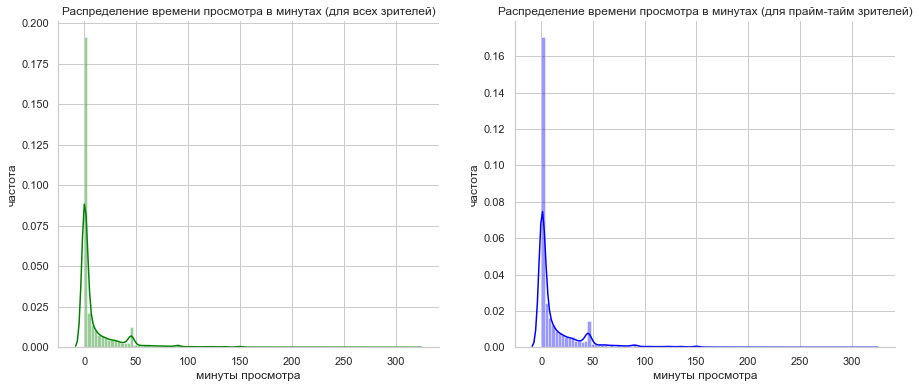

In [1915]:
# выводим гистораммы с распределением времени просмотра

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
sns.distplot(df_flat['view_duration_minutes'], bins = 100, color = 'green', ax = ax1)
ax1.set_xlabel('минуты просмотра')
ax1.set_ylabel('частота')
ax1.set_title('Распределение времени просмотра в минутах (для всех зрителей)')
ax1.grid(True)
sns.despine()

sns.distplot(df_flat.query('session_name != "unknown"')['view_duration_minutes'], bins = 100, color = 'blue', ax = ax2)
ax2.set_xlabel('минуты просмотра')
ax2.set_ylabel('частота')
ax2.set_title('Распределение времени просмотра в минутах (для прайм-тайм зрителей)')
ax2.grid(True)
sns.despine()


# 📌📌📌

- Мы видим, что на обеих гистограммах больше всего значений с просмотрами около 0 минут. 

- Это значит, система зафиксировала краткосрочные просмотры не только среди общего числа зрителей (которые могли подключаться к просмотрам на несколько секунд в утренние / вечерние / ночные часы, просто чтобы проверить, например, насколько хорошо работает система для просмотра мероприятий), но и среди тех зрителей, которые подключались к мероприятию в прайм-тайм. 

- Данный факт может говорить о том, что система для просмотра непосредственно во время проведения мероприятий сработала не слишком хорошо и часто выбрасывала зрителей, либо среди зрителей было много таких, которые быстро отключались / переключались между разными мероприятиями. 

- Следующее пиковое значение по длительности просмотров как для всех зрителей, так и для тех, кто смотрел мероприятия в прайм-тайм, - 50 минут.

In [1916]:
# для каждого зрителя найдем суммарное время просмотра каждого мероприятия

users_events_view_duration = df_flat.groupby(['idPeople', 'potok', 'date_start', 'date_stop','session_name'])\
.agg({'view_duration_minutes' : 'sum'}).reset_index()

display('Cуммарное время просмотра каждого мероприятия для каждого зрителя:', 
        users_events_view_duration.head())

'Cуммарное время просмотра каждого мероприятия для каждого зрителя:'

,idPeople,potok,date_start,date_stop,session_name,view_duration_minutes
0,129,2,2022-06-30 15:00:00,2022-06-30 18:00:00,Вопросы работы и функций НМИЦ как особого вида...,88.516667
1,208,1,2022-06-30 15:00:00,2022-06-30 17:30:00,Индивидуализация лекарственного лечения опухол...,1.366667
2,208,2,2022-06-30 15:00:00,2022-06-30 18:00:00,Вопросы работы и функций НМИЦ как особого вида...,0.516667
3,208,4,2022-06-30 15:00:00,2022-06-30 17:30:00,Спорные вопросы диагностики и лечения перитоне...,0.316667
4,208,5,2022-06-30 15:00:00,2022-06-30 16:15:00,СИМПОЗИУМ AstraZeneca,14.416667


# 📌📌📌

- Здесь видно, как зритель с `id` 208 перескакивал с одного мероприятия на другое, но в итоге выбрал "СИМПОЗИУМ AstraZeneca" и смотрел его 14 минут. 

In [1917]:
# ф-ция для расчета 95-го перцентиля

def perc95(col):
    return np.percentile(col, q = 95)

In [1918]:
# ф-ция для расчета медианы

def perc50(col):
    return np.percentile(col, q = 50)

In [1919]:
# для каждого мероприятия считаем кол-во уникальных зрителей, минуты просмотра (сумму, 95-й перцентиль, медиану)

events_view_duration = users_events_view_duration.groupby(['potok', 'date_start', 'date_stop', 'session_name'])\
            .agg({'idPeople': 'nunique','view_duration_minutes': ['sum', perc95, perc50]}).reset_index()


events_view_duration.columns = ['potok', 'event_date_start', 'event_date_stop', 'session_name', 'unique_users_cnt', \
                    'total_view_duration_minutes', 'perc95_view_duration_minutes', 'median_view_duration_minutes']


# считаем, сколько в среднем минут длился просмотр у 1 зрителя

events_view_duration['avg_view_duration_minutes'] = round(events_view_duration['total_view_duration_minutes'] / \
                                                          events_view_duration['unique_users_cnt'])

# считаем, сколько длилось каждое мероприятие

events_view_duration['event_duration_minutes'] = (events_view_duration['event_date_stop'] - \
                              events_view_duration['event_date_start']).apply(lambda x: x.total_seconds()/60)

In [1920]:
display(events_view_duration.head())

,potok,event_date_start,event_date_stop,session_name,unique_users_cnt,total_view_duration_minutes,perc95_view_duration_minutes,median_view_duration_minutes,avg_view_duration_minutes,event_duration_minutes
0,1,2022-06-27 10:00:00,2022-06-27 12:15:00,Разбор стандартов местно-регшионального лечения,506,25308.583333,131.050000,42.725000,50.0,135.0
1,1,2022-06-27 12:15:00,2022-06-27 12:45:00,Открытие форума,293,4733.100000,30.000000,17.950000,16.0,30.0
2,1,2022-06-27 13:00:00,2022-06-27 15:30:00,Неоадъювантная терапия РМЖ,512,26793.400000,146.378333,42.150000,52.0,150.0
3,1,2022-06-27 15:30:00,2022-06-27 18:00:00,Сессия Гершановича,365,14848.883333,124.756667,17.250000,41.0,150.0
4,1,2022-06-28 10:00:00,2022-06-28 12:30:00,"Мастерская 1: В этом доме верят, что нет ничег...",366,12703.266667,132.904167,7.658333,35.0,150.0


In [1921]:
# по каждому потоку выводим на график информацию о длительности мероприятий, 95-й перцентиль по времени 
# просмотра у зрителей, среднее время просмотра у зрителей 

for p in events_view_duration['potok'].unique():
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x= events_view_duration.query(f'potok == {p}')['event_date_start'],
        y= events_view_duration.query(f'potok == {p}')['event_duration_minutes'],
        name="продолжительность мероприятия", fill='tozeroy'      
    ))


    fig.add_trace(go.Scatter(
        x= events_view_duration.query(f'potok == {p}')['event_date_start'],
        y= events_view_duration.query(f'potok == {p}')['perc95_view_duration_minutes'],
        name="95-й перцентиль t просмотра пользователей", fill='tozeroy' 
    ))

    fig.add_trace(go.Scatter(
        x= events_view_duration.query(f'potok == {p}')['event_date_start'],
        y= events_view_duration.query(f'potok == {p}')['avg_view_duration_minutes'],
        name="среднее t просмотра пользователей", fill='tozeroy'
    ))

    fig.update_layout(
        title = {
            'text': f"Продолжительность мероприятий и их просмотров (для потока {p})",
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
         legend = {"title" : "переменные"},
         xaxis_title= f"даты мероприятий в потоке {p}", 
         yaxis_title= "минуты")


    fig.show()

<div class="alert alert-block alert-warning">

<div id='id-section23'/>

### [Вывод](#id-section24)

- На графиках мы видим, что в потоках 1-4 **не более 5% зрителей по времени просмотра приближаются почти вплотную к длительности самих мероприятий** (см. 95-й перцентиль). 

- При этом в потоках 5-6 эта отметка значительно ниже, что может косвенно свидетельствовать о меньшей заинтересованности зрителей досмотреть эти мероприятия до конца.  
---    

- **Среднее время просмотра мероприятий** по (почти) всем потокам составляет примерно треть от их длительности. 

- По среднему времени просмотра значительно выбивается в худшую сторону только поток 6 - там эта отметка ниже, чем во всех остальных потоках. 
    
---
- Данные по потоку 6 могут говорить о возможных проблемах с подключением для просмотра мероприятий у зрителей. Это подтверждается картиной, которую мы уже видели ранее на гистограммах: много просмотров около 0 минут (мы предполагаем, что система для просмотра непосредственно во время проведения мероприятий сработала не слишком хорошо и часто выбрасывала зрителей, либо среди зрителей было много таких, которые быстро отключались / переключались между разными мероприятиями). 
    

</div>    


<div id='id-section25'/>

## [5. Графики: как по каждой сессии во времени (интервал 5 минут) изменялось количество уникальных пользователей, которые смотрят трансляцию](#id-section26)

In [1922]:
# ф-ция для разбивки временных промежутков на интервалы

def get_interval(start, end, delta):
    lst = []
    time = start
    while time < end: 
        lst.append(time)
        time = time + delta
    return lst
    

In [1923]:
# ф-ция для получения кол-ва уникальных зрителей за каждый временной интервал

def getUniqUsers(potok, timestamp, delta):
    start = timestamp
    stop = start + delta
    return df_flat.query('potok == @potok and session_name != "unknown"')\
                                        .query('not(dateend < @start or datestart > @stop)')['idPeople'].nunique()
    

In [1924]:
display(events_all.head())

,date_start,potok,session_name,group_lec,timestamp_start,date_stop,timestamp_stop,event_index
0,2022-07-03 09:00:00,1,Лучевая терапия при нейроонкологических заболе...,radiotherapy,1656838800000000000,2022-07-03 10:35:00,1656844500000000000,0
1,2022-07-03 10:35:00,1,Лучевая терапия при злокачественных новообразо...,radiotherapy,1656844500000000000,2022-07-03 12:20:00,1656850800000000000,1
2,2022-07-03 12:30:00,1,Лучевая терапия злокачественных новообразовани...,radiotherapy,1656851400000000000,2022-07-03 14:30:00,1656858600000000000,2
3,2022-07-03 15:00:00,1,Лучевая терапия рака молочной железы,radiotherapy,1656860400000000000,2022-07-03 16:00:00,1656864000000000000,3
4,2022-07-03 16:00:00,1,Лучевая терапия злокачественных новообразовани...,radiotherapy,1656864000000000000,2022-07-03 18:30:00,1656873000000000000,4


In [1925]:
# по каждому потоку определяем начало и конец всех мероприятий (за всю неделю проведения форума)

potoks = events_all.groupby('potok').agg({'date_start' : 'min', 'date_stop': 'max'}).reset_index()

In [1926]:
display(potoks)

,potok,date_start,date_stop
0,1,2022-06-27 10:00:00,2022-07-03 18:30:00
1,2,2022-06-27 09:30:00,2022-07-03 13:00:00
2,3,2022-06-27 10:00:00,2022-07-03 18:40:00
3,4,2022-06-27 10:00:00,2022-07-03 17:30:00
4,5,2022-06-27 13:00:00,2022-07-03 15:00:00
5,6,2022-06-27 09:00:00,2022-07-02 17:30:00


In [1927]:
# по каждому потоку формируем все возможные 5-минутные интервалы (они записываются в список)

potoks['intervals'] = potoks.apply(lambda x: get_interval(x['date_start'], x['date_stop'], \
                                                          pd.Timedelta('5m')), axis = 1)

In [1928]:
display(potoks)

,potok,date_start,date_stop,intervals
0,1,2022-06-27 10:00:00,2022-07-03 18:30:00,"[2022-06-27 10:00:00, 2022-06-27 10:05:00, 202..."
1,2,2022-06-27 09:30:00,2022-07-03 13:00:00,"[2022-06-27 09:30:00, 2022-06-27 09:35:00, 202..."
2,3,2022-06-27 10:00:00,2022-07-03 18:40:00,"[2022-06-27 10:00:00, 2022-06-27 10:05:00, 202..."
3,4,2022-06-27 10:00:00,2022-07-03 17:30:00,"[2022-06-27 10:00:00, 2022-06-27 10:05:00, 202..."
4,5,2022-06-27 13:00:00,2022-07-03 15:00:00,"[2022-06-27 13:00:00, 2022-06-27 13:05:00, 202..."
5,6,2022-06-27 09:00:00,2022-07-02 17:30:00,"[2022-06-27 09:00:00, 2022-06-27 09:05:00, 202..."


In [1929]:
# разворачиваем списки с 5-минутными интервалами

potoks_exp = potoks.explode('intervals').reset_index()

potoks_exp = potoks_exp.drop('index', axis=1)

display(potoks_exp.head())

,potok,date_start,date_stop,intervals
0,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:00:00
1,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:05:00
2,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:10:00
3,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:15:00
4,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:20:00


In [1930]:
potoks_exp = potoks_exp.rename(columns = {'date_start' : 'potok_first_dtime', 'date_stop': 'potok_last_dtime',\
                                         'intervals': 'event_intervals'})

display(potoks_exp.head())

,potok,potok_first_dtime,potok_last_dtime,event_intervals
0,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:00:00
1,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:05:00
2,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:10:00
3,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:15:00
4,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:20:00


In [1931]:
# для каждого потока и 5-минутного интервала находим кол-во уникальных зрителей

potoks_exp['uniq_users_cnt'] = potoks_exp.apply\
(lambda x: getUniqUsers(x['potok'], x['event_intervals'], pd.Timedelta('5m')), axis = 1)

In [1932]:
display(potoks_exp.head())

,potok,potok_first_dtime,potok_last_dtime,event_intervals,uniq_users_cnt
0,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:00:00,157
1,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:05:00,168
2,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:10:00,188
3,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:15:00,193
4,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:20:00,203


In [1933]:
# выводим отдельно даты (нужны для построения графика)
potoks_exp['event_date'] = potoks_exp['event_intervals'].dt.strftime('%Y-%m-%d')

# выводим часы (чтобы исключить из графика вечер и ночь)
potoks_exp['event_hour'] = potoks_exp['event_intervals'].dt.hour

display(potoks_exp.head())

,potok,potok_first_dtime,potok_last_dtime,event_intervals,uniq_users_cnt,event_date,event_hour
0,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:00:00,157,2022-06-27,10
1,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:05:00,168,2022-06-27,10
2,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:10:00,188,2022-06-27,10
3,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:15:00,193,2022-06-27,10
4,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:20:00,203,2022-06-27,10


In [1934]:
# графики для каждого дня проведения форума

for d in potoks_exp['event_date'].unique():
    
    fig = potoks_exp.query(f'event_date == "{d}" and (9 <= event_hour <= 19) ').pivot_table(index = \
                           'event_intervals', columns = 'potok', \
                           values = 'uniq_users_cnt', aggfunc = 'sum').plot()
    
    fig.update_layout(
        title = {
            'text': f"Количество уникальных зрителей по потокам {d}",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
         legend = {"title" : "потоки"},
         xaxis_title= "интервалы (5 мин)", 
         yaxis_title= "кол-во уникальных зрителей")
    
    fig.show()

<div class="alert alert-block alert-warning">

<div id='id-section27'/>

### [Вывод](#id-section28)

- Поток 1 в каждый день проведения форума обгонял все остальные потоки по количеству уникальных зрителей. А вот потоки 5-6 всегда выглядят отстающими от других. 
    
- В первый день форума потоки 1-2 привлекли максимумы по уникальным зрителям, в последующие дни их число снижалось.  
    
- В предпоследний и последний дни форума по всем потокам зафиксировано минимальное количество уникальных зрителей.    
    

</div>    


<div id='id-section29'/>

## [6. Графики: как по каждой сессии во времени (интервал 5 минут) изменялось количество уникальных пользователей, которые смотрят трансляцию более 15 минут](#id-section30)

In [1935]:
# найденное на предыдущем шаге кол-во уникальных зрителей обозначаем как общее (all_uniq_users_cnt)

potoks_exp = potoks_exp.rename(columns = {'uniq_users_cnt' : 'all_uniq_users_cnt'})

display(potoks_exp.head())

,potok,potok_first_dtime,potok_last_dtime,event_intervals,all_uniq_users_cnt,event_date,event_hour
0,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:00:00,157,2022-06-27,10
1,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:05:00,168,2022-06-27,10
2,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:10:00,188,2022-06-27,10
3,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:15:00,193,2022-06-27,10
4,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:20:00,203,2022-06-27,10


In [1936]:
# видоизменяем ф-цию, чтобы теперь она захватывала зрителей с просмотрами более 15 мин

def getUniqUsers1(potok, timestamp, delta):
    start = timestamp
    stop = start + delta
    return df_flat.query('potok == @potok and session_name != "unknown" and view_duration_minutes > 15')\
                                        .query('not(dateend < @start or datestart > @stop)')['idPeople'].nunique()
   

In [1937]:
# считаем кол-во уникальных зрителей с просмотрами более 15 мин

potoks_exp['long_view_uniq_users_cnt'] = potoks_exp.apply\
(lambda x: getUniqUsers1(x['potok'], x['event_intervals'], pd.Timedelta('5m')), axis = 1)

In [1938]:
display(potoks_exp.head())

,potok,potok_first_dtime,potok_last_dtime,event_intervals,all_uniq_users_cnt,event_date,event_hour,long_view_uniq_users_cnt
0,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:00:00,157,2022-06-27,10,84
1,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:05:00,168,2022-06-27,10,108
2,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:10:00,188,2022-06-27,10,133
3,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:15:00,193,2022-06-27,10,142
4,1,2022-06-27 10:00:00,2022-07-03 18:30:00,2022-06-27 10:20:00,203,2022-06-27,10,157


In [1939]:
# рисуем графики, аналогично предыдущему пункту

for d in potoks_exp['event_date'].unique():
    
    fig = potoks_exp.query(f'event_date == "{d}" and (9 <= event_hour <= 19) ').pivot_table(index = \
                           'event_intervals', columns = 'potok', \
                           values = 'long_view_uniq_users_cnt', aggfunc = 'sum').plot()
    
    fig.update_layout(
        title = {
            'text': f"Количество уникальных зрителей с просмотрами > 15 мин {d}",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
         legend = {"title" : "потоки"},
         xaxis_title= "интервалы (5 мин)", 
         yaxis_title= "кол-во уникальных зрителей")
    
    fig.show()

<div class="alert alert-block alert-warning">

<div id='id-section31'/>

### [Вывод](#id-section32)

- На данных графиках мы видим тенденции, аналогичные тем, что были зафиксированы на предыдущем шаге.

- Отдельно отметим, что 28.06.2022 поток 4 опередил обычно лидирующие потоки 1-2. Это может означать, что в течение всего дня мероприятия в потоке 4 были особенно интересны зрителям форума.
---

- Для удобства ниже мы вывели в отдельную сравнительную таблицу `comparison_users_cnt` общее количество уникальных зрителей в 5-минутные интервалы, а также тех, кто смотрел трансляции более 15 минут.     
    

</div>    


In [1940]:
comparison_users_cnt = potoks_exp.query('9 <= event_hour <= 19')[['potok', 'event_intervals', 'all_uniq_users_cnt',\
                                                                 'long_view_uniq_users_cnt']]

display('Сравнительная таблица по количеству зрителей в 5-минутные интервалы ', 
        comparison_users_cnt)

'Сравнительная таблица по количеству зрителей в 5-минутные интервалы '

,potok,event_intervals,all_uniq_users_cnt,long_view_uniq_users_cnt
0,1,2022-06-27 10:00:00,157,84
1,1,2022-06-27 10:05:00,168,108
2,1,2022-06-27 10:10:00,188,133
3,1,2022-06-27 10:15:00,193,142
4,1,2022-06-27 10:20:00,203,157
...,...,...,...,...
10539,6,2022-07-02 17:05:00,0,0
10540,6,2022-07-02 17:10:00,0,0
10541,6,2022-07-02 17:15:00,0,0
10542,6,2022-07-02 17:20:00,0,0


<div id='id-section33'/>

## [7. По каждой сессии считаем, сколько по длительности каждый уникальный пользователь смотрел трансляцию](#id-section34)


In [1941]:
display(users_events_view_duration)

,idPeople,potok,date_start,date_stop,session_name,view_duration_minutes
0,129,2,2022-06-30 15:00:00,2022-06-30 18:00:00,Вопросы работы и функций НМИЦ как особого вида...,88.516667
1,208,1,2022-06-30 15:00:00,2022-06-30 17:30:00,Индивидуализация лекарственного лечения опухол...,1.366667
2,208,2,2022-06-30 15:00:00,2022-06-30 18:00:00,Вопросы работы и функций НМИЦ как особого вида...,0.516667
3,208,4,2022-06-30 15:00:00,2022-06-30 17:30:00,Спорные вопросы диагностики и лечения перитоне...,0.316667
4,208,5,2022-06-30 15:00:00,2022-06-30 16:15:00,СИМПОЗИУМ AstraZeneca,14.416667
...,...,...,...,...,...,...
21500,3631,4,2022-06-27 15:30:00,2022-06-27 18:00:00,Меланома и опухоли кожи.Круглый стол,0.600000
21501,3631,5,2022-06-27 16:45:00,2022-06-27 18:15:00,СИМПОЗИУМ AstraZeneca,0.300000
21502,3632,1,2022-06-27 15:30:00,2022-06-27 18:00:00,Сессия Гершановича,0.450000
21503,3632,2,2022-06-27 15:30:00,2022-06-27 18:30:00,Криогенные технологии в онкологии,0.166667


<div class="alert alert-block alert-warning">

<div id='id-section35'/>

### [Вывод](#id-section36)

Такая таблица (`users_events_view_duration`) уже была сформирована ранее. 
    
</div>    


<div id='id-section37'/>

## [8. По каждой сессии считаем количество пользователей, у которых сессия была 0 минут, 1 минута, 5 минут, 15 минут, 30 минут и более](#id-section38)

In [1942]:
# ф-ция для разбивки на требуемые категории

def category(element):
    if 0 <= element < 1:
        return "0 min"
    if 1 <= element < 2:
        return "1 min"
    if 5 <= element < 6:
        return "5 min"
    if 15 <= element < 16:
        return "15 min"
    if element >= 30:
        return "30 min or more"
    else:
        return "other"

In [1943]:
category_users_events_view_duration = users_events_view_duration

# выделяем категории 
category_users_events_view_duration['viewing_category'] = \
                        category_users_events_view_duration['view_duration_minutes'].apply(category)

In [1944]:
display(category_users_events_view_duration.head(5))

,idPeople,potok,date_start,date_stop,session_name,view_duration_minutes,viewing_category
0,129,2,2022-06-30 15:00:00,2022-06-30 18:00:00,Вопросы работы и функций НМИЦ как особого вида...,88.516667,30 min or more
1,208,1,2022-06-30 15:00:00,2022-06-30 17:30:00,Индивидуализация лекарственного лечения опухол...,1.366667,1 min
2,208,2,2022-06-30 15:00:00,2022-06-30 18:00:00,Вопросы работы и функций НМИЦ как особого вида...,0.516667,0 min
3,208,4,2022-06-30 15:00:00,2022-06-30 17:30:00,Спорные вопросы диагностики и лечения перитоне...,0.316667,0 min
4,208,5,2022-06-30 15:00:00,2022-06-30 16:15:00,СИМПОЗИУМ AstraZeneca,14.416667,other


In [1945]:
# формируем таблицу, где для каждого мероприятия подсчитано кол-во зрителей из каждой категории 
# согласно времени просмотра

category_events_view_duration = pd.crosstab(columns=category_users_events_view_duration['viewing_category'],\
         index=[category_users_events_view_duration["potok"],category_users_events_view_duration["date_start"],\
         category_users_events_view_duration["date_stop"], category_users_events_view_duration["session_name"]],\
         margins=False).reset_index()


category_events_view_duration = category_events_view_duration.rename(index={'viewing_category': 'index'})

display(category_events_view_duration)

viewing_category,potok,date_start,date_stop,session_name,0 min,1 min,15 min,30 min or more,5 min,other
0,1,2022-06-27 10:00:00,2022-06-27 12:15:00,Разбор стандартов местно-регшионального лечения,103,18,2,276,8,99
1,1,2022-06-27 12:15:00,2022-06-27 12:45:00,Открытие форума,57,9,5,57,3,162
2,1,2022-06-27 13:00:00,2022-06-27 15:30:00,Неоадъювантная терапия РМЖ,96,25,2,280,7,102
3,1,2022-06-27 15:30:00,2022-06-27 18:00:00,Сессия Гершановича,97,20,1,157,4,86
4,1,2022-06-28 10:00:00,2022-06-28 12:30:00,"Мастерская 1: В этом доме верят, что нет ничег...",126,16,3,139,6,76
...,...,...,...,...,...,...,...,...,...,...
124,6,2022-06-30 09:00:00,2022-06-30 18:30:00,Минимальноинвазивная эзофагэктомия,59,7,0,54,4,25
125,6,2022-07-01 09:00:00,2022-07-01 12:30:00,Лапароскопическая гистерэктомия при раке эндом...,52,4,0,44,0,28
126,6,2022-07-01 12:30:00,2022-07-01 14:00:00,Круглый стол по итогу сессии Live-surgery,16,1,0,0,0,38
127,6,2022-07-01 14:00:00,2022-07-01 16:30:00,«серые зоны» в стандартах лечения рака эндометрия,8,0,0,0,0,0


<div class="alert alert-block alert-warning">

<div id='id-section39'/>

### [Вывод](#id-section40)

Сформирована таблица `category_events_view_duration`. 
    
</div>    


<div id='id-section41'/>

## [9. Когорный анализ по глубине просмотра по каждой сессии](#id-section42)

In [1946]:
# вводим логические переменные с глубиной просмотра (более 0, 1, 5 мин и т.д.)

wide_users_events_view_duration = users_events_view_duration

wide_users_events_view_duration['0m_view_dur'] = wide_users_events_view_duration['view_duration_minutes'] >= 0

wide_users_events_view_duration['1m_view_dur'] = wide_users_events_view_duration['view_duration_minutes'] >= 1
                                            
wide_users_events_view_duration['5m_view_dur'] = wide_users_events_view_duration['view_duration_minutes'] >= 5

wide_users_events_view_duration['15m_view_dur'] = wide_users_events_view_duration['view_duration_minutes'] >= 15

wide_users_events_view_duration['30m_view_dur'] = wide_users_events_view_duration['view_duration_minutes'] >= 30
                                              
wide_users_events_view_duration['60m_view_dur'] = wide_users_events_view_duration['view_duration_minutes'] >= 60
                                              
wide_users_events_view_duration['90m_view_dur'] = wide_users_events_view_duration['view_duration_minutes'] >= 90
                                              
wide_users_events_view_duration['120m_view_dur'] = wide_users_events_view_duration['view_duration_minutes'] >= 120                                              

In [1947]:
display(wide_users_events_view_duration.head())

,idPeople,potok,date_start,date_stop,session_name,view_duration_minutes,viewing_category,0m_view_dur,1m_view_dur,5m_view_dur,15m_view_dur,30m_view_dur,60m_view_dur,90m_view_dur,120m_view_dur
0,129,2,2022-06-30 15:00:00,2022-06-30 18:00:00,Вопросы работы и функций НМИЦ как особого вида...,88.516667,30 min or more,True,True,True,True,True,True,False,False
1,208,1,2022-06-30 15:00:00,2022-06-30 17:30:00,Индивидуализация лекарственного лечения опухол...,1.366667,1 min,True,True,False,False,False,False,False,False
2,208,2,2022-06-30 15:00:00,2022-06-30 18:00:00,Вопросы работы и функций НМИЦ как особого вида...,0.516667,0 min,True,False,False,False,False,False,False,False
3,208,4,2022-06-30 15:00:00,2022-06-30 17:30:00,Спорные вопросы диагностики и лечения перитоне...,0.316667,0 min,True,False,False,False,False,False,False,False
4,208,5,2022-06-30 15:00:00,2022-06-30 16:15:00,СИМПОЗИУМ AstraZeneca,14.416667,other,True,True,True,False,False,False,False,False


In [1948]:
# формируем воронку по глубине просмотра для каждого события 

funnel_events_view_duration = wide_users_events_view_duration.groupby(['potok', 'date_start', 'date_stop',\
                                                                     'session_name']).agg\
({'0m_view_dur' : 'sum', '1m_view_dur':'sum', '5m_view_dur':'sum', '15m_view_dur':'sum', '30m_view_dur':'sum',
 '60m_view_dur': 'sum', '90m_view_dur':'sum', '120m_view_dur':'sum'}).reset_index()



funnel_events_view_duration.columns = ['potok','event_start','event_stop','session_name', '0m_or_more_view_dur',\
                                          '1m_or_more_view_dur','5m_or_more_view_dur','15m_or_more_view_dur',\
                                          '30m_or_more_view_dur', '60m_or_more_view_dur', '90m_or_more_view_dur',\
                                          '120m_or_more_view_dur']


display('Воронка глубины просмотра для каждого мероприятия в горизонтальном виде: ', \
        funnel_events_view_duration)

'Воронка глубины просмотра для каждого мероприятия в горизонтальном виде: '

,potok,event_start,event_stop,session_name,0m_or_more_view_dur,1m_or_more_view_dur,5m_or_more_view_dur,15m_or_more_view_dur,30m_or_more_view_dur,60m_or_more_view_dur,90m_or_more_view_dur,120m_or_more_view_dur
0,1,2022-06-27 10:00:00,2022-06-27 12:15:00,Разбор стандартов местно-регшионального лечения,506.0,403.0,354.0,320.0,276.0,201.0,136.0,50.0
1,1,2022-06-27 12:15:00,2022-06-27 12:45:00,Открытие форума,293.0,236.0,200.0,159.0,57.0,0.0,0.0,0.0
2,1,2022-06-27 13:00:00,2022-06-27 15:30:00,Неоадъювантная терапия РМЖ,512.0,416.0,359.0,319.0,280.0,200.0,133.0,84.0
3,1,2022-06-27 15:30:00,2022-06-27 18:00:00,Сессия Гершановича,365.0,268.0,221.0,189.0,157.0,114.0,81.0,37.0
4,1,2022-06-28 10:00:00,2022-06-28 12:30:00,"Мастерская 1: В этом доме верят, что нет ничег...",366.0,240.0,196.0,166.0,139.0,93.0,57.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124,6,2022-06-30 09:00:00,2022-06-30 18:30:00,Минимальноинвазивная эзофагэктомия,149.0,90.0,76.0,62.0,54.0,50.0,41.0,35.0
125,6,2022-07-01 09:00:00,2022-07-01 12:30:00,Лапароскопическая гистерэктомия при раке эндом...,128.0,76.0,62.0,50.0,44.0,29.0,16.0,10.0
126,6,2022-07-01 12:30:00,2022-07-01 14:00:00,Круглый стол по итогу сессии Live-surgery,55.0,39.0,34.0,0.0,0.0,0.0,0.0,0.0
127,6,2022-07-01 14:00:00,2022-07-01 16:30:00,«серые зоны» в стандартах лечения рака эндометрия,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1949]:
display('Воронка глубины просмотра для каждого мероприятия в вертикальном виде: ',
        funnel_events_view_duration.transpose())

'Воронка глубины просмотра для каждого мероприятия в вертикальном виде: '

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
potok,1,1,1,1,1,1,1,1,1,1,...,5,6,6,6,6,6,6,6,6,6
event_start,2022-06-27 10:00:00,2022-06-27 12:15:00,2022-06-27 13:00:00,2022-06-27 15:30:00,2022-06-28 10:00:00,2022-06-28 12:30:00,2022-06-28 15:00:00,2022-06-29 10:00:00,2022-06-29 12:30:00,2022-06-29 15:00:00,...,2022-07-03 12:30:00,2022-06-27 09:00:00,2022-06-28 09:20:00,2022-06-29 09:00:00,2022-06-29 14:00:00,2022-06-30 09:00:00,2022-07-01 09:00:00,2022-07-01 12:30:00,2022-07-01 14:00:00,2022-07-02 10:00:00
event_stop,2022-06-27 12:15:00,2022-06-27 12:45:00,2022-06-27 15:30:00,2022-06-27 18:00:00,2022-06-28 12:30:00,2022-06-28 15:00:00,2022-06-28 17:30:00,2022-06-29 12:30:00,2022-06-29 15:00:00,2022-06-29 18:00:00,...,2022-07-03 15:00:00,2022-06-27 18:00:00,2022-06-28 17:30:00,2022-06-29 14:00:00,2022-06-29 16:30:00,2022-06-30 18:30:00,2022-07-01 12:30:00,2022-07-01 14:00:00,2022-07-01 16:30:00,2022-07-02 17:30:00
session_name,Разбор стандартов местно-регшионального лечения,Открытие форума,Неоадъювантная терапия РМЖ,Сессия Гершановича,"Мастерская 1: В этом доме верят, что нет ничег...","Мастерская 2. В этом доме верят, что нет ничег...","Мастерская 3. В этом доме верят, что нет ничег...",Заседание Санкт-Петербургской Школы онкологии ...,VIII Конференция им. М.Л. Гершановича: Олигоме...,Нутритивная поддержка в работе врача-онколога:...,...,Агрессивные опухоли основания черепа,Современные возможности визуализации и хирурги...,Хирургическое лечение рака простаты,Лапароскопическая тотальная мезоректумэктомия,Лапароскопическая и роботическая тотальная мез...,Минимальноинвазивная эзофагэктомия,Лапароскопическая гистерэктомия при раке эндом...,Круглый стол по итогу сессии Live-surgery,«серые зоны» в стандартах лечения рака эндометрия,Возможности оперативной эндоскопии в онкологии
0m_or_more_view_dur,506,293,512,365,366,356,273,405,364,283,...,30,131,148,170,90,149,128,55,8,61
1m_or_more_view_dur,403,236,416,268,240,233,194,326,295,218,...,20,28,70,108,67,90,76,39,0,37
5m_or_more_view_dur,354,200,359,221,196,202,180,290,274,202,...,17,20,45,91,61,76,62,34,0,24
15m_or_more_view_dur,320,159,319,189,166,180,164,260,249,183,...,14,17,37,79,52,62,50,0,0,19
30m_or_more_view_dur,276,57,280,157,139,150,128,236,223,156,...,11,7,27,67,42,54,44,0,0,15
60m_or_more_view_dur,201,0,200,114,93,103,75,166,165,98,...,4,1,18,49,25,50,29,0,0,11


# 📌📌📌 

За 7 дней было проведено 129 мероприятий. Мы охватим только тройки самых популярных и наименее популярных мероприятий и по каждому из них отрисуем воронки просмотров.  

In [1950]:
# 3 самых популярных мероприятия
top_3_events_view = funnel_events_view_duration.sort_values(by = '0m_or_more_view_dur', ascending = False).head(3)

# 3 наименее популярных мероприятия
last_3_events_view = funnel_events_view_duration.sort_values(by = '0m_or_more_view_dur', ascending = False).tail(3)

In [1951]:
# рисуем воронки

def funnel(table):
    
    sessions = list(table['session_name'])
    
    for session in sessions:

        sort_table = table.query(f'session_name == "{session}"')[:1][list(table.columns[4:])].transpose()
        
        potok = table.query(f'session_name == "{session}"')['potok'].values[0]
        date = pd.to_datetime(table.query(f'session_name == "{session}"')['event_start'].values[0], \
                              format='%Y-%m-%d')
        

        time_view_lst = list(sort_table.index)
        value_lst = sort_table[sort_table.columns[0]].values

        fig = go.Figure(go.Funnel(
            y = time_view_lst,
            x = value_lst,
            textposition = "inside",
            textinfo = "value+percent initial",
            hoverinfo='x+y+percent initial+percent previous'
            ))

        fig.update_layout(
            title={
                'text': f"Воронка просмотров для сессии {session} <br> поток {potok}, {date}",
                'y':0.9,
                'x':0.55,
                'xanchor': 'center',
                'yanchor': 'top'},
            legend = {'title' : "длительность просмотров"},      
        )

        fig.show()

In [1952]:
for t in [top_3_events_view, last_3_events_view]:
    funnel(t)

<div class="alert alert-block alert-warning">

<div id='id-section43'/>

### [Вывод](#id-section44)

**Тройка самых популярных мероприятий** (показали наибольшее число подключившихся пользователей):
1. "Сохранение фертильности онкологических больных" (поток 2, 28.06, 09:45) - 513 зрителей подключились к просмотру, из них 23% смотрели сессию более 2 часов. 
2. "Неоадъювантная терапия РМЖ от А до Я" (поток 1, 27.06, 13:00) - 512 зрителей подключились, но уже 16% дошли до конца сессии.
3. "Разбор стандартов местно-регионарного лечения" (поток 1, 27.06, 10:00) - 506 зрителей подключились к просмотру, однако только 10% смотрели сессию более 2 часов.  
✦ Здесь просматривается тенденция к тому, что по трем самым популярным сессиям с уменьшением изначального числа зрителей убывает и процентное соотношение для тех, кто досмотрел сессию до конца. 
---
    
По **трем самым непопулярным сессиям** (они показали наименьшее число подключившихся пользователей) ситуация следующая:
1. "СИМПОЗИУМ BMS" (поток 5, 30.06, 14:45) изначально собрал 21 зрителя, из них 29% продвинулись дальше 15 минут просмотра (но не более).
2. "Онкологическая повестка: нюансы работы в информационном пространстве" (поток 3, 30.06, 15:30) - 18 зрителей в начале, 2 в конце.
3. К "Дискуссионной панели «Серые зоны» в стандартах лечения рака эндометрия" подключилось 8 зрителей, и ни один не продолжил просмотр. Вероятно, здесь произошла техническая проблема с подключением.     
    
---
    
Воронка по всем событиям представлена в таблице `funnel_events_view_duration`.    
</div>    


<div id='id-section45'/>

## [10. С каких устройств смотрели форум пользователи](#id-section46)

In [1953]:
# смотрим на зафиксированные типы устройств
# (они не нуждаются в корректировке)

display(df_flat['device'].unique())

array(['Мобильное', 'Десктоп', 'Планшет'], dtype=object)

In [1954]:
# смотрим на зафиксированные типы операционных систем

display(df_flat['opsystem'].unique())

array(['iOS 14.7.1', 'Windows', 'iOS 15.4.1', 'Android', 'Windows 7',
       'Linux', 'iOS 15.3.1', 'iOS 15.5', 'iOS 14.8', 'Mac OS X 10.15.6',
       'Mac OS X 10.15.7', 'Android 7.1.1', 'Android 7', 'iOS 10.3.4',
       'iOS 14.8.1', 'iOS 12.5.5', 'Android 8', 'iOS 14.4.2', 'iOS 15',
       'Android 6', 'iOS 14.7', 'Mac OS X 10.14.6', 'iOS 12.4.1',
       'iOS 14.6', 'iOS 15.4', 'Android 8.1', 'iOS 11.2.5', 'iOS 14.4.1',
       'iOS 15.1', 'Android 7.1.2', 'iOS 15.2.1', 'iOS 13.2', 'iOS 12.4',
       'iOS 14', 'iOS 13.6.1', 'iOS 11.3', 'iOS 13.3', 'iOS 15.3',
       'Mac OS X 10.14', 'iOS 15.2', 'Mac OS X 10.11.6', 'Windows 8',
       'iOS 13.7', 'Mac OS X 10.15', 'iOS 12.5', 'Mac OS X 10.13.6',
       'iOS 15.6', 'iOS 13.5.1', 'Mac OS X 10.10.5', 'Mac OS X 10.15.4',
       'iOS 14.4', 'Mac OS X 10.15.3', 'iOS 13.4.1', 'Windows XP',
       'Ubuntu', 'iOS 13.3.1', 'iOS 15.1.1', 'iOS 13.2.3', 'iOS 12.3.1',
       'Android 5.1.1', 'Mac OS X 10.11', 'Mac OS X 10.12.6', 'iOS 12.1',
      

In [1955]:
# ф-ция для унификации операционных систем

def sep(string):
    el = string.split(' ')[0]
    if el == 'Windows' or el == 'Windows ':
        return 'Windows'
    if el == 'Android' or el == 'Android ':
        return 'Android'    
    if el == 'iOS' or el == 'iOS ':
        return 'iOS'
    if el == 'Mac' or el == 'Mac ':
        return 'Mac'
    if el == 'Linux' or el == 'Linux ':
        return 'Linux'
    if el == 'Ubuntu' or el == 'Ubuntu ':
        return 'Ubuntu'
    
    else:
        return 'unknown'
        

In [1956]:
# добавляем их в новый столбец

df_flat['opsystem_short'] =  df_flat['opsystem'].apply(sep)

In [1957]:
# так выглядит разделение

display(df_flat['opsystem_short'].value_counts())

Windows    32831
iOS        19211
Android    17197
Mac         1627
Linux       1435
Ubuntu        38
Name: opsystem_short, dtype: int64

,device,unique_users_cnt
0,Десктоп,1137
1,Мобильное,962
2,Планшет,43


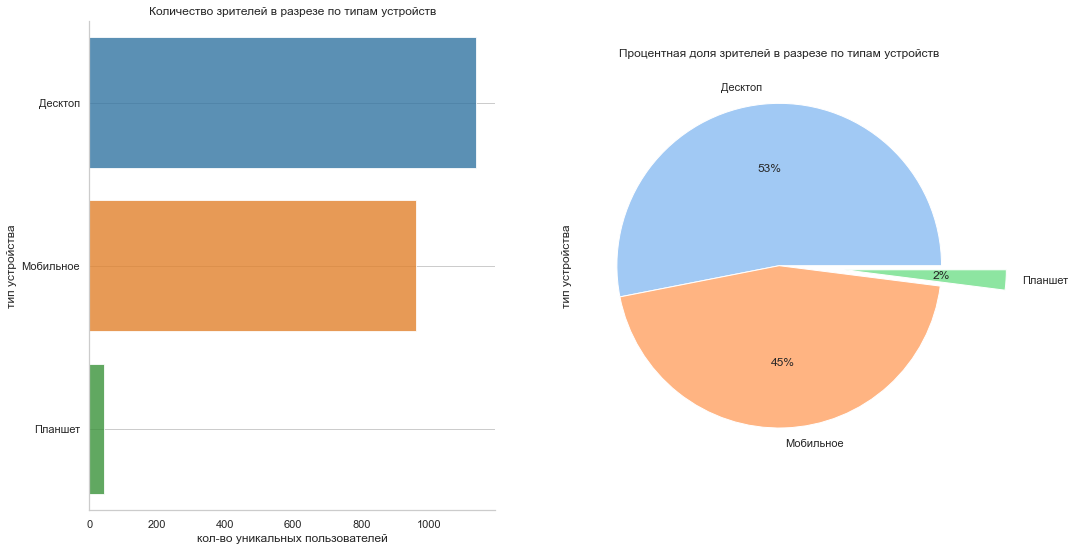

In [1958]:
# считаем кол-во уникальных пользователей по каждому типу устройств и выводим результат на графики

users_by_device = df_flat.query('session_name != "unknown"').groupby('device').agg({'idPeople' : 'nunique'})\
.reset_index()

users_by_device = users_by_device.rename(columns = {'idPeople': 'unique_users_cnt'})

display(users_by_device)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 9))

sns.barplot(x = 'unique_users_cnt', y = 'device', orient = "h", order = users_by_device['device'],\
                data = users_by_device, alpha=.8, palette = "tab10", ax = ax1)
ax1.set_xlabel('кол-во уникальных пользователей')
ax1.set_ylabel('тип устройства')
ax1.set_title('Количество зрителей в разрезе по типам устройств')
ax1.grid()
sns.despine()
  
palette_color = sns.color_palette('pastel') 
explode = [0, 0, 0.4]
plt.pie(users_by_device['unique_users_cnt'], labels=users_by_device['device'], colors=palette_color, \
        explode = explode, autopct='%.0f%%')
ax2.set_ylabel('тип устройства')
ax2.set_title('Процентная доля зрителей в разрезе по типам устройств')
ax2.grid()
sns.despine()

# 📌📌📌

- 53% зрителей смотрели форум через `desktop`-устройства, так как они наиболее удобны для просмотра видео. 

- Вторые по популярности – мобильные устройства. 

- Меньше всего зрителей (2%) подключались к форуму посредством планшетов. Это можно объяснить общим снижением популярности таких устройств у пользователей в последние годы.

,device,opsystem_type,unique_users_cnt
0,Десктоп,Linux,47
1,Десктоп,Mac,100
2,Десктоп,Ubuntu,2
3,Десктоп,Windows,1040
4,Мобильное,Android,500
5,Мобильное,iOS,482
6,Планшет,Android,28
7,Планшет,iOS,15


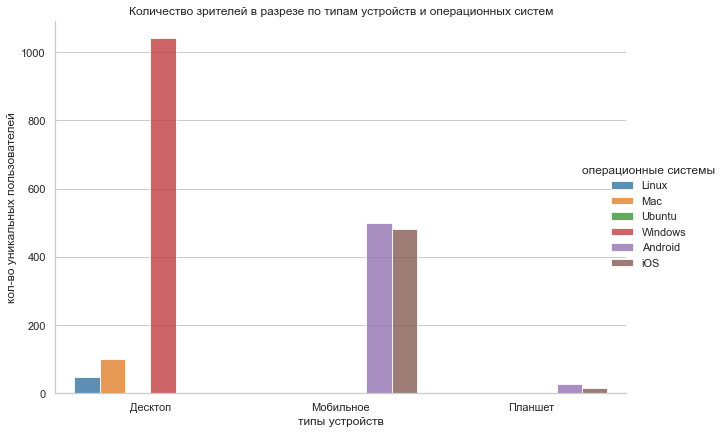

In [1959]:
# кол-во уникальных пользователей по каждому типу устройств и оп. систем 

users_by_device_opsystem = df_flat.query('session_name != "unknown"').groupby(['device', 'opsystem_short'])\
.agg({'idPeople' : 'nunique'}).reset_index()

users_by_device_opsystem = users_by_device_opsystem.rename(columns = {'opsystem_short' : 'opsystem_type', \
                                                                     'idPeople' : 'unique_users_cnt'})

display(users_by_device_opsystem)


# график

sns.set_theme(style="whitegrid")
ax = sns.catplot(
    data = users_by_device_opsystem, kind="bar",
    x="device", y="unique_users_cnt", hue = "opsystem_type",
    palette="tab10", alpha=.8, height=6, aspect=1.5)

ax.legend.set_title("операционные системы")
sns.despine()
plt.title('Количество зрителей в разрезе по типам устройств и операционных систем')
plt.xlabel('типы устройств')
plt.ylabel('кол-во уникальных пользователей')
plt.show()

# 📌📌📌

- На графике отчетливо видно, что подавляющее большинство зрителей форума – это пользователи операционной системы Windows. 

- Также довольно много зрителей подключались к трансляциям через телефоны на базе Android и (чуть реже) iOS. 

<div class="alert alert-block alert-warning">

<div id='id-section47'/>

### [Вывод](#id-section48)
    
- **53% зрителей смотрели форум через `desktop`-устройства**, так как они наиболее удобны для просмотра видео.
- Вторые по популярности – мобильные устройства.
- Меньше всего зрителей (2%) подключались к форуму посредством планшетов. Это можно объяснить общим снижением популярности таких устройств у пользователей в последние годы.
---
    
- Подавляющее большинство зрителей форума – это пользователи операционной системы **Windows**.
- Также довольно много зрителей подключались к трансляциям через телефоны на базе Android и (чуть реже) iOS.    
    
    
</div>    


<div id='id-section49'/>

## [11. По каждой сессии вывести по 10 пользователей с id и временем просмотра которые смотрели максимальное количество времени (данную сессию)](#id-section50)

In [1960]:
# для каждого мероприятия выводим по 10 самых длинных просмотров + id зрителей

top_10_users = users_events_view_duration.groupby(['potok', 'date_start', 'date_stop',\
                    'session_name']).apply(lambda x: x.nlargest(10,['view_duration_minutes'])).reset_index(drop=True)

In [1961]:
top_10_users = top_10_users[['idPeople','potok','date_start','date_stop','session_name','view_duration_minutes']]

top_10_users = top_10_users.rename(columns = {'idPeople':'user_id', 'date_start':'event_start',\
                                             'date_stop':'event_stop'})


In [1962]:
display(top_10_users)

,user_id,potok,event_start,event_stop,session_name,view_duration_minutes
0,1953,1,2022-06-27 10:00:00,2022-06-27 12:15:00,Разбор стандартов местно-регшионального лечения,136.333333
1,1909,1,2022-06-27 10:00:00,2022-06-27 12:15:00,Разбор стандартов местно-регшионального лечения,135.000000
2,2140,1,2022-06-27 10:00:00,2022-06-27 12:15:00,Разбор стандартов местно-регшионального лечения,135.000000
3,2214,1,2022-06-27 10:00:00,2022-06-27 12:15:00,Разбор стандартов местно-регшионального лечения,135.000000
4,2505,1,2022-06-27 10:00:00,2022-06-27 12:15:00,Разбор стандартов местно-регшионального лечения,135.000000
...,...,...,...,...,...,...
1283,2608,6,2022-07-02 10:00:00,2022-07-02 17:30:00,Возможности оперативной эндоскопии в онкологии,151.183333
1284,2612,6,2022-07-02 10:00:00,2022-07-02 17:30:00,Возможности оперативной эндоскопии в онкологии,108.516667
1285,2415,6,2022-07-02 10:00:00,2022-07-02 17:30:00,Возможности оперативной эндоскопии в онкологии,78.883333
1286,2602,6,2022-07-02 10:00:00,2022-07-02 17:30:00,Возможности оперативной эндоскопии в онкологии,74.216667


<div class="alert alert-block alert-warning">

<div id='id-section51'/>

### [Вывод](#id-section52)
 
Сформирована таблица `top_10_users`.    
    
    
</div>    
